In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

1)

In [2]:
mnist_df=tf.keras.datasets.mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test)=mnist_df #untuple the data first

In [4]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_full=np.concatenate([X_train,X_test])
y_full=np.concatenate([y_train,y_test])

In [6]:
X_full.shape,y_full.shape

((70000, 28, 28), (70000,))

In [7]:
X_full_scaled=X_full/255.0 #scale the full dataset

In [8]:
train=int((5/7)*X_full_scaled.shape[0]);train

50000

In [9]:
X_train_scaled=X_full_scaled[:train]
y_train=y_full[:train]

In [10]:
X_train_scaled.shape,y_train.shape

((50000, 28, 28), (50000,))

In [11]:
valid=int((1/7)*X_full_scaled.shape[0]);valid

10000

In [12]:
X_valid_scaled=X_full_scaled[train:train+valid]
y_valid=y_full[train:train+valid]

In [13]:
X_valid_scaled.shape,y_valid.shape

((10000, 28, 28), (10000,))

In [14]:
test=int((1/7)*X_full_scaled.shape[0]);test

10000

In [15]:
X_test_scaled=X_full_scaled[train+valid:]
y_test=y_full[train+valid:]

In [16]:
X_test_scaled.shape,y_test.shape

((10000, 28, 28), (10000,))

In [17]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

2)

In [18]:
def onehot_prep(y):
    return(tf.one_hot(y,depth=10,on_value=1.0, off_value=0.0)) #create one hot encoded vectors

In [19]:
y_train_onehot=onehot_prep(y_train)
y_valid_onehot=onehot_prep(y_valid)
y_test_onehot=onehot_prep(y_test)

In [20]:
y_valid_onehot.shape

TensorShape([10000, 10])

3)

In [21]:
model = Sequential([
    Conv2D(filters=8, kernel_size=(5, 5), activation='relu', padding = 'same', input_shape=(28,28,1)),
    MaxPool2D(),
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(),
    Flatten(),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=10, activation='softmax')
])

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4)

In [23]:
model.compile(optimizer=Adam(),loss="categorical_crossentropy",metrics=["accuracy"])

5)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
callback=EarlyStopping(patience=5,monitor="val_loss")

In [26]:
history_model = model.fit(X_train_scaled,y_train_onehot, epochs=100, 
                          validation_data=(X_valid_scaled,y_valid_onehot),callbacks=[callback])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7935 - loss: 0.6209 - val_accuracy: 0.9766 - val_loss: 0.0784
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9698 - loss: 0.0981 - val_accuracy: 0.9831 - val_loss: 0.0591
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9755 - loss: 0.0781 - val_accuracy: 0.9861 - val_loss: 0.0488
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9803 - loss: 0.0598 - val_accuracy: 0.9864 - val_loss: 0.0461
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9843 - loss: 0.0494 - val_accuracy: 0.9870 - val_loss: 0.0461
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9843 - loss: 0.0472 - val_accuracy: 0.9889 - val_loss: 0.0368
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9865 - loss: 0.0420 - val_accuracy: 0.9902 - val_loss: 0.0343
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 

6)

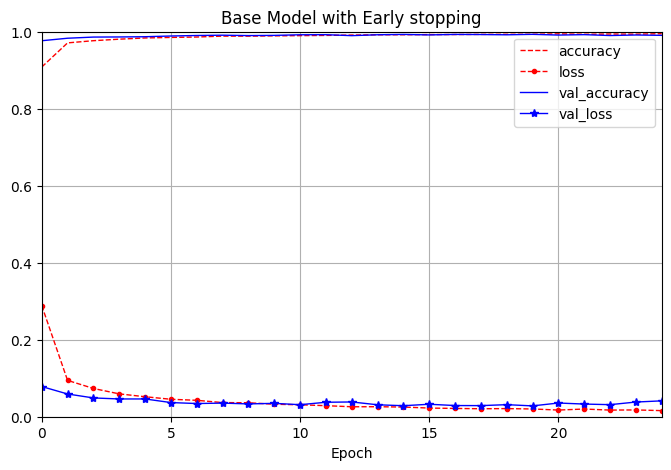

In [29]:
pd.DataFrame(history_model.history).plot(
    figsize=(8, 5), xlim=[0, 24], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"],linewidth=1)
plt.legend(loc="upper right")
plt.title("Base Model with Early stopping")
plt.show()

As we can see from the graph our model performs really well both in training and validation,achieving accuracy closed to 100%. Also training and validation losses converge on a value close to zero which means that our model does not overfit.

7)

In [30]:
model_predictions=np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [31]:
cl_report=classification_report(np.argmax(y_test_onehot,axis=-1), model_predictions)

In [32]:
print(cl_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



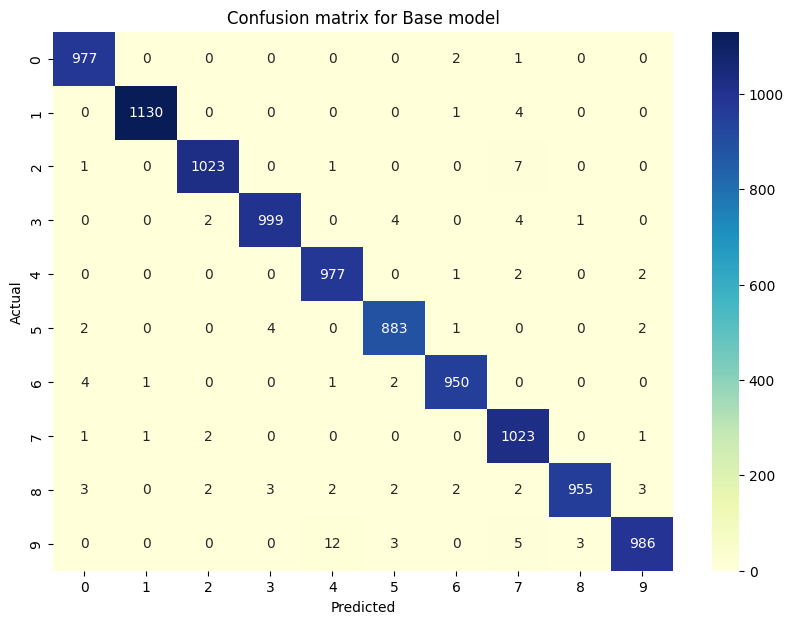

In [33]:
cm=confusion_matrix(np.argmax(y_test_onehot,axis=-1),model_predictions)
cm_matrix = pd.DataFrame(data=cm)
plt.figure(figsize=(10,7))
ax=sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
ax.set_title(f"Confusion matrix for Base model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
test_acc=accuracy_score(np.argmax(y_test_onehot,axis=-1),model_predictions)

In [39]:
print(f"Accuracy Score is {test_acc:.4f}")

Accuracy Score is 0.9903


As we can see from classification report and accuracy score our model achieves accuracy of approximately 99%.